In [595]:
#file names
file_1 = "train.csv"
file_2 = "test.csv"

In [596]:
import pandas as pd
import matplotlib as plt

f_1 = pd.read_csv(file_1)
f_2 = pd.read_csv(file_2)

#checking the missing values from our dataset 
missing_values_after = f_1.isnull().sum() 
print("the missing values after filling:")
print(missing_values_after)

#f_1.dropna(inplace = True) remove them
print(f_1.dtypes)
#filling the missing values that are missing
f_1["LotFrontage"].fillna(f_1["LotFrontage"].mean(), inplace = True)
missing_values_before = f_1.isnull().sum()
print("the missing values before filling: ")
print(missing_values_before)
print(f_1.shape)

the missing values after filling:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
the missing values before filling: 
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
(1460, 81)


C:\Users\walid\AppData\Local\Temp\ipykernel_26268\3031136771.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  f_1["LotFrontage"].fillna(f_1["LotFrontage"].mean(), inplace = True)


In [597]:
#hundeling -seperating- types of data we have
numerical_columns = f_1.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_columns = f_1.select_dtypes(include= ['object']).columns.tolist()
#binary_columns = [col for col in f_1 if f_1[col].nunique() == 2]
#categorical_columns_cleaned = [col for col  in categorical_columns if col not in binary_columns]
print("numerical columns : ", numerical_columns)
print("categorical columns :", categorical_columns)
#print("binary columns : ", binary_columns)
numerical_set = set(numerical_columns)
categorical_set = set(categorical_columns)
#binary_set = set(binary_columns)
numerical_categorical_intersection = numerical_set.intersection(categorical_set)
#binary_categorical_intersection = binary_set.intersection(categorical_set)
#binary_numerical_intersection = binary_set.intersection(numerical_set)

print(numerical_categorical_intersection  )
alpha =  'PoolQC' in categorical_columns
print(alpha)
alpha_1 = f_1['SalePrice'].min()
print(alpha_1)

numerical columns :  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
categorical columns : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firepl

In [598]:
#feature engineering step
f_1_encoded = pd.get_dummies(f_1, columns = categorical_columns, drop_first=True)

#scaling numerical values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
f_1_encoded[numerical_columns] = scaler.fit_transform(f_1_encoded[numerical_columns])
#missing values in dataSet can be used after one-hot
missing_values_f_1 = f_1.isnull().sum()
missing_values_f_1[missing_values_f_1>0]


Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [599]:
#sale_price is our target
X_train = f_1_encoded.drop('SalePrice', axis=1)
y_train = f_1_encoded['SalePrice']

In [600]:
#trainning phase [problem with missing values but WHY?]
from sklearn.impute import SimpleImputer
missing_in_X_train = X_train.isnull().sum()
missing_in_X_train[missing_in_X_train>0]
imputer = SimpleImputer(strategy='mean')
X_train[['MasVnrArea', 'GarageYrBlt']] = imputer.fit_transform(X_train[['MasVnrArea', 'GarageYrBlt']]) #imputating the missing values using a strategy in this case we used mean
missing_in_X_train = X_train.isnull().sum()
missing_in_X_train[missing_in_X_train>0]

Series([], dtype: int64)

In [601]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
model = LinearRegression()
#training the model on the the training data
model.fit(X_train, y_train)

#predictions
y_train_predict = model.predict(X_train)

#Evaluation model performances on the training data
rmse_train = np.sqrt(mean_absolute_error(y_train, y_train_predict))
mae_train = mean_absolute_error(y_train, y_train_predict)

print(f"train rmse :{rmse_train}")
print(f"train mae :{mae_train}")

train rmse :0.4232407061934774
train mae :0.1791326953791535


In [602]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = f_1_encoded.corr()
#plt.figure(figsize=(100,50))    TOO MANY COLUMNS NO NEED FOR THE MATRIX
#sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
#plt.show()s

In [603]:
#sns.pairplot(f_1_encoded)
#plt.show()


<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

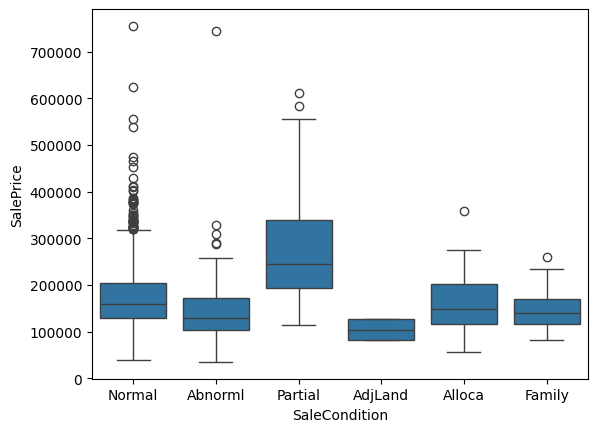

In [604]:
sns.boxplot(x='SaleCondition', y='SalePrice', data=f_1)
#plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

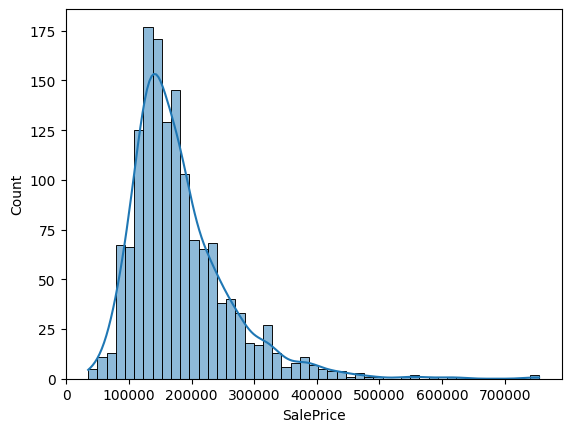

In [605]:
sns.histplot(f_1['SalePrice'], kde=True)  # kde=True to show kernel density estimate
#plt.show()

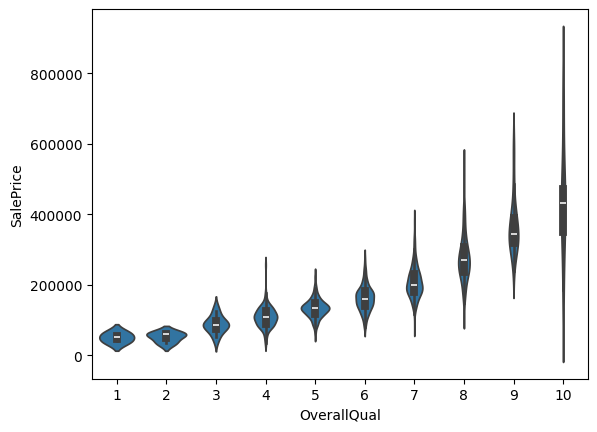

In [606]:
sns.violinplot(x='OverallQual', y='SalePrice', data=f_1)
plt.show()

USING FEATURE ENGINEERING TOOLS? IN ODRER TO REDUCE THE RMSE

In [607]:
missing_erea = f_1['LotArea'].isnull().sum()
missing_price_home = f_1['SalePrice'].isnull().sum()
print(missing_erea)
print(missing_price_home)


0
0


In [608]:
#creating new feature see the correlation between the price and the other columns
sale_price_corr = corr_matrix['SalePrice']
sale_price_corr_pos = sale_price_corr[sale_price_corr>0.4]
important_features = sale_price_corr_pos.index.tolist()
important_features.remove('SalePrice')
print("selected features :", important_features)

selected features : ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Neighborhood_NridgHt', 'ExterQual_Gd', 'Foundation_PConc', 'BsmtFinType1_GLQ']


In [609]:
#NEW MODEL TO TRY
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor 
X = f_1_encoded[important_features]
Y = f_1_encoded['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=34)
print("training and testing sets created.")

my_model = HistGradientBoostingRegressor()
my_model.fit(X_train, Y_train)
y_pred = my_model.predict(X_test)
print("model trained and predictions made.")


training and testing sets created.
model trained and predictions made.


In [610]:
#EVALUATION
rmse_train2 = np.sqrt(mean_absolute_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)
mae_train2 = mean_absolute_error(Y_test, y_pred)

print(f"test rmse :{rmse_train2}")
print(f"test r2 :{r2}")
print(f"test mae : {mae_train2}")

test rmse :0.5303462038165976
test r2 :0.7562989896540161
test mae : 0.28126709590267607


In [611]:
my_model1 = HistGradientBoostingRegressor(random_state=30)
para_grid = {
    'learning_rate' : [0.01, 0.05, 0.1],
    'max_depth' : [3, 5, 8],
    'max_iter' : [50, 75, 100],
    'min_samples_leaf' : [2, 5, 9],
    'max_leaf_nodes' : [31, 42, 63],
    'l2_regularization' : [0, 0.1, 1]
}

grid_search = GridSearchCV(estimator=my_model1, param_grid=para_grid,cv = 5, scoring='average_precision', n_iter = 10, n_jobs=-1, verbose=2 )
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"the best parms are : {best_params}")
print(f"Best RMSE (Cross-validated): {np.sqrt(-best_score)}")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


KeyboardInterrupt: 